In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# dir() is a powerful inbuilt function in Python3, which returns list of the attributes and methods of any object 
# (say functions , modules, strings, lists, dictionaries etc.)
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data , columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# possible values of target variables are 0,1,2
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# want to explore how many datapoints have 1 in it 
df[df.target==1].head()
# from here we understood that versicolor starts from 50 and virginica starts from 100

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [10]:
# here from one column u r trying to generate another column and the way u do in pandas by using apply function .
# and here lambda is just a small function or transformation that u apply on target column and u generate new column called 
# flower name.
df['flower_name']=df.target.apply(lambda x :iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
from matplotlib import pyplot as plt

In [18]:
%matplotlib inline

In [19]:
# now we have to create 3 different dataframes
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [20]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


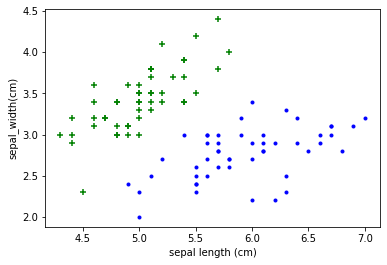

In [22]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal_width(cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'green',marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'blue',marker = '.')


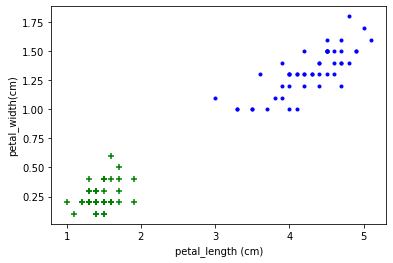

In [23]:
plt.xlabel('petal_length (cm)')
plt.ylabel('petal_width(cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'green',marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'blue',marker = '.')


In [24]:
from sklearn.model_selection import train_test_split

In [26]:
# now we have to drop here extra columns or target columns 
x = df.drop(['target','flower_name'],axis = 1)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [67]:
len(x_train)

120

In [93]:
len(x_test)

30

In [94]:
# increasing regularization is actually decreasing my score , in this regularization is denoted by c
from sklearn.svm import SVC
model = SVC()

In [95]:
model.fit(x_train,y_train)

SVC()

In [96]:
model.score(x_test,y_test)

0.9666666666666667